## Introduction

The data set chosen to be analysed in this Jupyter Notebook is the
**Adult Data Set** from the UCI Archives.
It presents a plethora of information on Adults, from their education, to their education and also
their anual income.

### Identification of variables and data types.

The variables and types presented in the data set are the following:

1. **age**: Continuous, ordinal variable. <br>
2. **workclass**: Continuous, ordinal variable.<br>
3. **fnlwgt**: Discrete, nominal variable.<br>
4. **education**: Continuous, ordinal variable.<br>
5. **education-num**: Continuous, nominal variable.<br>
6. **marital-status**: Discrete, nominal variable.<br>
7. **occupation**: Discrete, nominal variable.<br>
8. **relationship**: Discrete, nominal variable.<br>
9. **race**: Discrete, nominal variable.<br>
10. **sex**: Binary, nominal variable.<br>
11. **capital-gain**: Continuous, ordinal variable.<br>
12. **capital-loss**: Continuous, ordinal variable.<br>
13. **hours-per-week**: Continuous, ordinal variable.<br>
14. **native-country**: Discrete, nominal variable.<br>
15. **anual-income**: Continuous, ordinal variable.<br>

### Example:

 <table style="width:100%">
  <tr>
    <th>age</th>
    <th>workclass</th>
    <th>fnlwgt</th>
    <th>education</th>
    <th>education-num</th>
    <th>marital-status</th>
    <th>occupation</th>
    <th>relationship</th>
    <th>race</th>
    <th>sex</th>
    <th>capital-gain</th>
    <th>capital-loss</th>
    <th>hours-per-week</th>
    <th>native-country</th>
    <th>anual-income</th>
  </tr>
  <tr>
    <td>39</td>
    <td>State-gov</td>
    <td>77516</td>
    <td>Bachelors</td>
    <td>13</td>
    <td>Never-married</td>
    <td>Adm-clerical</td>
    <td>Not-in-family</td>
    <td>White</td>
    <td>Male</td>
    <td>2174</td>
    <td>0</td>
    <td>40</td>
    <td>United-States</td>
    <td><=50K</td>
  </tr>
</table>

## Statistical Univariate Analysis. Using descriptive parameters and graphical tools


The following plots show a basic overview of the values presented in the data set.

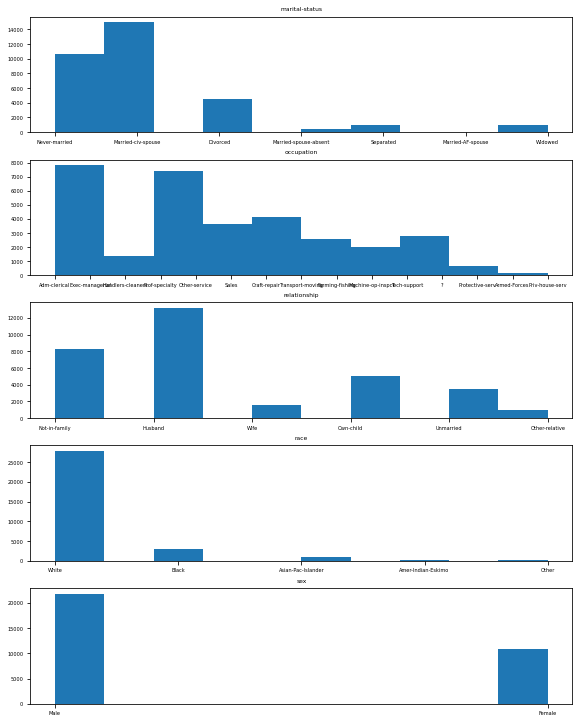

In [4]:
#numeric
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
import pandas as pd
# graphics
%matplotlib inline 

from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.datasets import load_iris

#Disable warning

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("DATA/adult_data.csv",header = 0)
df.head()

features_mean=list(df.columns[5:10])
plt.rcParams.update({'font.size': 5})
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    df[features_mean[idx]] = df[features_mean[idx]]
    a=df[features_mean[idx]]
    ax.hist(a)
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()


## Boxplots


Boxplots are a method used to graphically illustrate numerical data through their quartiles. The median, the
minimium and maximium value and the quartiles are the values presented.

It was chosen to present the boxplots for the attributes **fnlwgt** and **hours-per-week** for no particular reason other than that they are, out of the box,
numeric data. If it was opportune a normalization could be done to a specific attribute in order to analyse it through boxplots but that was not done here.



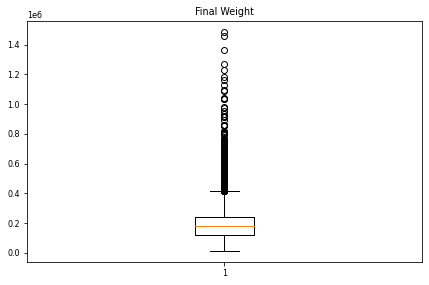

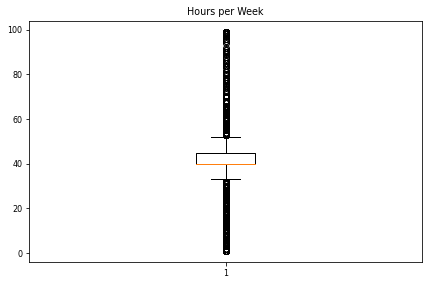

In [5]:
# boxplot

#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})


plt.figure()
plt.title('Final Weight')
data_to_plot = [df['fnlwgt']]
plt.boxplot(data_to_plot)

plt.tight_layout()
plt.show()

plt.rcParams.update({'font.size': 8})

plt.figure()
plt.title('Hours per Week')
data_to_plot = [df['hours-per-week']]
plt.boxplot(data_to_plot)

plt.tight_layout()
plt.show()

## Value Treatment

In this data set there are some values that, because of a missing values, are replaced with a Question Mark (?).
For that reason and to facilitate the data analysis the lines where this happened could be removed.

In [6]:
file_dataset = pd.read_csv("DATA/adult_data.csv")
count = 0

for csv_index, row in file_dataset.iterrows():
    aux = False
    for column_value in row:
        if column_value == '?':
            file_dataset.drop(csv_index)
            count += 1
            break


print("There are ", count, " invalid lines in the document.")


There are  2399  invalid lines in the document.


## Variable transformations

### Transformation to numeric values

In [7]:
origin = []
for csv_index, row in file_dataset.iterrows():

    if row[13] not in origin :
        origin.append(row[13])


origin_series = pd.Series(origin)
cat_origin = origin_series.astype('category')
cat_origin.cat.codes


lb_make = LabelEncoder()
origin_encoded = lb_make.fit_transform(cat_origin)
#print(origin_encoded)

In the code shown we made a **transformation to numeric** values of the 'native-country' collumn  to associate a number to each string present in this field.
So in this case, we replaced each country name for a numeric value.

### Scaling and Normalization

In [8]:

file_dataset = pd.read_csv("DATA/adult_data.csv", usecols=['hours-per-week'])

scaler = MinMaxScaler()
X = file_dataset.values

scaler.fit(X)

X_scaled = scaler.transform(X)

X_scaled.min(axis=0)
X_scaled.max(axis=0)

X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

print(np.allclose(X_scaled, X_manual_scaled))


True


On this chunk of code we use **max-min scaler** to normalize de data present on the 12th collumn of our data set, corresponding to the **'hours-per-week'**.
So this code has the function to normalize the data present in this field. We use the **'scaler.transfor(X)'** function to do so, and we also do it 'manualy' with the code present five lines above the previous one.
We do this so we can compare results to check if the implementation is correct. As we can see from the print of **'np.allclose()'s** result the imlementation is correct.